Data Summary for cut_value=0.999915:
ggHH        : NSR= 62276, Ntotal=2022050, Eff=0.030798 ± 0.000123
ggHHherwig  : NSR= 34082, Ntotal=1962057, Eff=0.017371 ± 0.000094
ggHHvincia  : NSR= 60453, Ntotal=1967174, Eff=0.030731 ± 0.000125
ZZ          : NSR=    39, Ntotal=   4860, Eff=0.008025 ± 0.001285
ZZherwig    : NSR=    14, Ntotal=   5879, Eff=0.002381 ± 0.000636
ZZvincia    : NSR=    43, Ntotal=   6516, Eff=0.006599 ± 0.001006

Data Summary for cut_value=0.997:
ggHH        : NSR=841812, Ntotal=2022050, Eff=0.416316 ± 0.000454
ggHHherwig  : NSR=680108, Ntotal=1962057, Eff=0.346630 ± 0.000420
ggHHvincia  : NSR=832517, Ntotal=1967174, Eff=0.423205 ± 0.000464
ZZ          : NSR=   728, Ntotal=   4860, Eff=0.149794 ± 0.005552
ZZherwig    : NSR=   701, Ntotal=   5879, Eff=0.119238 ± 0.004504
ZZvincia    : NSR=   950, Ntotal=   6516, Eff=0.145795 ± 0.004730


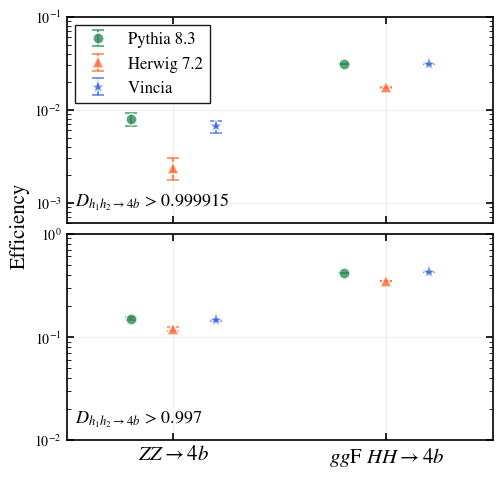

In [6]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['font.family'] = 'STIXGeneral'
mpl.rcParams['font.size'] = 11
mpl.rcParams['axes.linewidth'] = 1.2
mpl.rcParams['xtick.major.width'] = 1.2
mpl.rcParams['ytick.major.width'] = 1.2


# cut_value=0.999915
data_dict_high = {
    'ggHH': {'NSR': 62276, 'Ntotal': 2022050},
    'ggHHherwig': {'NSR': 34082, 'Ntotal': 1962057},
    'ggHHvincia': {'NSR': 60453, 'Ntotal': 1967174},
    'ZZ': {'NSR': 39, 'Ntotal': 4860},
    'ZZherwig': {'NSR': 14, 'Ntotal': 5879},
    'ZZvincia': {'NSR': 43, 'Ntotal': 6516}
}

# cut_value=0.997
data_dict_low = {
    'ggHH': {'NSR': 841812, 'Ntotal': 2022050},
    'ggHHherwig': {'NSR': 680108, 'Ntotal': 1962057},
    'ggHHvincia': {'NSR': 832517, 'Ntotal': 1967174},
    'ZZ': {'NSR': 728, 'Ntotal': 4860},
    'ZZherwig': {'NSR': 701, 'Ntotal': 5879},
    'ZZvincia': {'NSR': 950, 'Ntotal': 6516}
}

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(5.5, 5.5), sharex=True)

colors = ['#2E8B57', '#FF6B35', '#4169E1']  
markers = ['o', '^', '*']
marker_sizes = [8, 9, 11]
generator_labels = [r'Pythia 8.3', 'Herwig 7.2', 'Vincia ']

x_positions = np.array([0.8, 1.2])
width = 0.08

def plot_data(ax, data_dict, title, cut_value):
    legend_handles = []
    
    processes = ['ZZ', 'ggHH']
    generators = ['', 'herwig', 'vincia']
    
    for j, gen in enumerate(generators):
        x_vals = []
        y_vals = []
        y_errs = []
        
        for i, process in enumerate(processes):
            if gen == '':
                key = process
            else:
                key = f"{process}{gen}"
            
            if key in data_dict:
                NSR = data_dict[key]['NSR']
                Ntotal = data_dict[key]['Ntotal']
                efficiency = NSR / Ntotal
                error = np.sqrt(NSR) / Ntotal
                
                x_pos = x_positions[i] + (j-1)*width
                x_vals.append(x_pos)
                y_vals.append(efficiency)
                y_errs.append(error)
        
        if len(x_vals) == 2:
            points = ax.errorbar(x_vals, y_vals, yerr=y_errs,
                               marker=markers[j], color=colors[j], 
                               markersize=marker_sizes[j], capsize=4, capthick=1.5,
                               linestyle='none', markeredgewidth=1.2,
                               markerfacecolor=colors[j], markeredgecolor='white',
                               elinewidth=1.5, alpha=0.8)
            
            legend_handles.append(points)
    
    # ax.set_ylabel('Efficiency', fontsize=12, fontweight='bold')
    ax.set_xlim(0.6, 1.4)
    ax.set_yscale('log')
    
    ax.grid(True, alpha=0.3, linestyle='-', linewidth=0.5)
    ax.set_axisbelow(True)
    
    ax.text(0.02, 0.05, r'$D_{h_1 h_2\to 4b}$ > ' + f'{cut_value}', 
            transform=ax.transAxes, fontsize=13, 
            verticalalignment='bottom')
    
    ax.spines['top'].set_visible(True)
    ax.spines['right'].set_visible(True)
    for spine in ax.spines.values():
        spine.set_linewidth(1.2)
    
    ax.tick_params(axis='both', which='major', labelsize=10, direction='in', 
                   top=True, right=True, length=5)
    ax.tick_params(axis='both', which='minor', direction='in', 
                   top=True, right=True, length=3)
    
    return legend_handles

legend_handles1 = plot_data(ax1, data_dict_high, "High Cut", "0.999915")
ax1.set_ylim(6e-4, 1e-1)

legend_handles2 = plot_data(ax2, data_dict_low, "Low Cut", "0.997")
ax2.set_ylim(1e-2, 1)

ax2.set_xticks(x_positions)
ax2.set_xticklabels([r'$ZZ \to 4b$', r'$gg$F $HH \to 4b$'], fontsize=15)

legend = ax1.legend(legend_handles1, generator_labels,
                   loc='upper left', frameon=True, fancybox=False, 
                   shadow=False, fontsize=12, ncol=1,
                   markerscale=1)

legend.get_frame().set_facecolor('white')
legend.get_frame().set_alpha(0.9)
legend.get_frame().set_edgecolor('black')
legend.get_frame().set_linewidth(1)

fig.text(0.04, 0.5, 'Efficiency', fontsize=15, 
         rotation=90, verticalalignment='center', horizontalalignment='center')

plt.subplots_adjust(hspace=0.05)

print("Data Summary for cut_value=0.999915:")
print("=" * 60)
for key, value in data_dict_high.items():
    efficiency = value['NSR'] / value['Ntotal']
    error = np.sqrt(value['NSR']) / value['Ntotal']
    print(f"{key:12}: NSR={value['NSR']:6}, Ntotal={value['Ntotal']:7}, "
          f"Eff={efficiency:.6f} ± {error:.6f}")

print("\nData Summary for cut_value=0.997:")
print("=" * 60)
for key, value in data_dict_low.items():
    efficiency = value['NSR'] / value['Ntotal']
    error = np.sqrt(value['NSR']) / value['Ntotal']
    print(f"{key:12}: NSR={value['NSR']:6}, Ntotal={value['Ntotal']:7}, "
          f"Eff={efficiency:.6f} ± {error:.6f}")

plt.savefig('PLOTS/generator_comparison_two_cuts.pdf', dpi=300, bbox_inches='tight')
plt.savefig('PLOTS/generator_comparison_two_cuts.png', dpi=300, bbox_inches='tight')

plt.show()
